In [ ]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.0 MB/s 
     |████████████████████████████████| 19.2 MB 285 kB/s 
     |████████████████████████████████| 240 kB 53.2 MB/s 
     |████████████████████████████████| 106 kB 62.8 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 943 kB 53.0 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 4.1 MB 43.1 MB/s 
     |████████████████████████████████| 1.9 MB 58.3 MB/s 
     |████████████████████████████████| 112 kB 42.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12224 sha256=ee37f7909442839a05cf55c1434477a2f2c832e2946442e5056f4402cd769925
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

In [ ]:
import numpy as np
from qiskit.opflow import I, X, Y, Z, MatrixEvolution, PauliTrotterEvolution
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.visualization import *
import numpy as np
from numpy import pi
import pylatexenc

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import qiskit
from qiskit import execute
import numpy as np
from qiskit.opflow import I, X, Y, Z, MatrixEvolution, PauliTrotterEvolution
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.visualization import *
import pylatexenc
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

#Matrix Representation

In [ ]:
a = np.array([[0, np.sqrt(1),0,0,0,0,0,0,0,0],
             [0, 0,np.sqrt(2),0,0,0,0,0,0,0],
             [0, 0,0,np.sqrt(3),0,0,0,0,0,0],
             [0, 0,0,0,np.sqrt(4),0,0,0,0,0],
             [0, 0,0,0,0,np.sqrt(5),0,0,0,0],
             [0, 0,0,0,0,0,np.sqrt(6),0,0,0],
             [0, 0,0,0,0,0,0,np.sqrt(7),0,0],
             [0, 0,0,0,0,0,0,0,np.sqrt(8),0],
             [0, 0,0,0,0,0,0,0,0,np.sqrt(9)],
             [0, 0,0,0,0,0,0,0,0,0]])

a_dagger = np.array([[0, 0,0,0,0,0,0,0,0,0],
             [np.sqrt(1), 0,0,0,0,0,0,0,0,0],
             [0, np.sqrt(2),0,0,0,0,0,0,0,0],
             [0, 0,np.sqrt(3),0,0,0,0,0,0,0],
             [0, 0,0,np.sqrt(4),0,0,0,0,0,0],
             [0, 0,0,0,np.sqrt(5),0,0,0,0,0],
             [0, 0,0,0,0,np.sqrt(6),0,0,0,0],
             [0, 0,0,0,0,0,np.sqrt(7),0,0,0],
             [0, 0,0,0,0,0,0,np.sqrt(8),0,0],
             [0, 0,0,0,0,0,0,0,np.sqrt(9),0]])

x = a + a_dagger
p = a - a_dagger
H = a_dagger@a + 1/2*np.identity(10)

In [ ]:
print(np.linalg.eig(x))
print(np.linalg.eig(p))
print(np.linalg.eig(a))
print(np.linalg.eig(a_dagger))

(array([-4.85946283, -3.58182348, -2.48432584, -1.46598909,  4.85946283,
       -0.48493571,  0.48493571,  1.46598909,  3.58182348,  2.48432584]), array([[-0.00207621, -0.02753309, -0.13824464,  0.36808111,  0.00207621,
        -0.58706246, -0.58706246,  0.36808111,  0.02753309,  0.13824464],
       [ 0.01008927,  0.09861866,  0.34344473, -0.53960289,  0.01008927,
         0.28468755, -0.28468755,  0.53960289,  0.09861866,  0.34344473],
       [-0.03320024, -0.23030577, -0.50557002,  0.29908555,  0.03320024,
         0.31749611,  0.31749611,  0.29908555,  0.23030577,  0.50557002],
       [ 0.08490913,  0.39574288,  0.44473088,  0.18744113,  0.08490913,
        -0.32133826,  0.32133826, -0.18744113,  0.39574288,  0.44473088],
       [-0.17755414, -0.50928993, -0.11459172, -0.39640902,  0.17755414,
        -0.1970455 , -0.1970455 , -0.39640902,  0.50928993,  0.11459172],
       [ 0.30991879,  0.46183786, -0.2704652 ,  0.09223737,  0.30991879,
         0.3301469 , -0.3301469 , -0.09223737

In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [ ]:
# Set number of qubits
num_qubits = 3
# Define time parameter
t = Parameter('t')
# Set total evolution time
evolution_time_t = 9.4
# Set size of time-step for Trotter evolution
time_step_value_t = 0.1
# Define the number of steps
steps_t = int(evolution_time_t/time_step_value_t)
# Create circuit
tight_binding_circuit = QuantumCircuit(num_qubits)
# Add initial state preparation

# Define the Hamiltonian, the time-evolution operator, the Trotter step and the total evolution
H =0.5*(I^Z^I) + (I^I^Z) + (I^I^I) + (I^I^I)
time_evolution_operator=H*t
time_evolution_operator=time_evolution_operator.exp_i()
###INSERT CODE BELOW THIS LINE
full_time_evolution_circuit=PauliTrotterEvolution().convert(time_evolution_operator)
full_time_evolution_circuit=full_time_evolution_circuit.bind_parameters({t:time_step_value_t})
for i in range(steps_t-1):
    full_time_evolution_circuit@=PauliTrotterEvolution().convert(time_evolution_operator)
    full_time_evolution_circuit=full_time_evolution_circuit.bind_parameters({t:time_step_value_t})
full_time_evolution_circuit=full_time_evolution_circuit.to_circuit()
full_time_evolution_circuit=tight_binding_circuit+full_time_evolution_circuit


qc = QuantumCircuit(3)
qc.x(1)
qc.h(2)
qc.cx(2,1)

mygate = full_time_evolution_circuit.to_gate()

qc.append(mygate,[0,1,2])
# qft(qc,3)
qc.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.


┌──────────────┐                                     ┌───┐   
q_0: ──────────┤0             ├──────■──────────────────────■───────┤ H ├─X─
     ┌───┐┌───┐│              │      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ X ├┤ X ├┤1 circuit-281 ├──────┼────────■───────┤ H ├─■─────────────┼─
     ├───┤└─┬─┘│              │┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├──■──┤2             ├┤ H ├─■────────■───────────────────────────X─
     └───┘     └──────────────┘└───┘

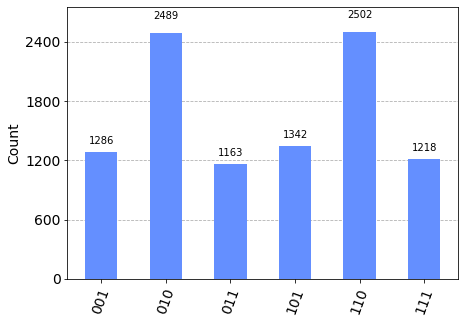

In [ ]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 10000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

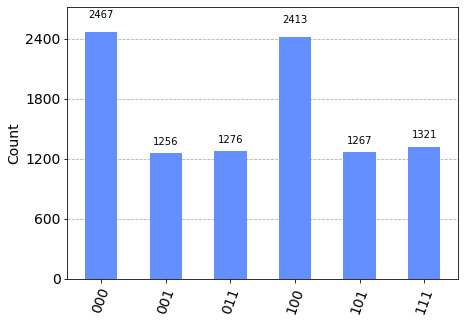

In [ ]:
qc1 = QuantumCircuit(3)
qc1.x(1)
qc1.h(2)
qc1.cx(2,1)
qft(qc1,3)
qc1.draw()
qc1.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc1, backend, shots = 10000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [ ]:
#peskin Quantum field theory 